In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def function_arm(num_arms,opt_u,delta):
    opt_u = opt_u  # set the first arm to have a prob of success = 0.5
    arms = [opt_u - delta for _ in range(num_arms)]
    arms[0] = opt_u
    return arms

In [23]:
def function_rewards(arms, t):
    return np.array([np.random.binomial(n=1, size=t + 1, p=i) for i in arms])

In [24]:
def ucb(arms, T, prize) :
    num_arms = len(arms)
    Nt = np.zeros(num_arms)
    reward = np.zeros(num_arms)
    ucb = np.zeros(num_arms)
    R = []

    for i in range(num_arms):
        reward[i] += prize[i][i]
        ucb[i] += prize[i][i]
        Nt += 1
        R_val = max(arms) - arms[i]
        R.append(R_val)
    
    for t in range(num_arms,T):
        for a in range(num_arms):
            u = reward[a] / Nt[a]
            ucb[a] += u + np.sqrt((np.log(T) / Nt[a]))
        action = np.argmax(ucb)
        reward[action] += prize[action][t]
        Nt[action] += 1

        R_val = max(arms) - arms[action]
        R.append(R_val)
    return np.cumsum(R)

In [25]:
def exp3(arms,T,rew):
    num_arms = len(arms)
    R = [0]
    rewards = np.zeros(num_arms)
    for t in range(1, T):
        eta = np.sqrt(np.log(num_arms) / (t * num_arms))
        x = np.array([np.exp(-eta * r) for r in rewards])
        y = np.sum(x)
        prob = x/y
        action = np.random.choice(num_arms, p=prob)
        r = abs(rew[action][t] - 1)
        r_a = r / prob[action]
        rewards[action] += r_a
        
        R_val = max(arms) - arms[action]
        R.append(R_val)
    return np.cumsum(R)

In [26]:
def simulation(algorithm, T, num_arms, delta):
    pseudo_regrets = []
    for _ in range(20):
        arms = function_arm(num_arms,opt_u, delta)
        rewards = function_rewards(arms, T)
        R = algorithm(arms, T, rewards)
        pseudo_regrets.append(R)
    means = np.mean(pseudo_regrets, axis=0)
    stds = np.std(pseudo_regrets, axis=0)
    return means, stds

In [27]:
T = 10000
delta = [0.25, 0.125, 0.0625]
num_arms = [2, 4, 8, 16]
algs = [ucb, exp3]
opt_u = 0.5

In [28]:
results = [{k: None for k in num_arms} for a in range(len(algs))]
for i in range(len(algs)):
    for a in num_arms:
        means = []
        stds = []
        for d in delta:
            alg_means, alg_stds = simulation(
                algs[i], T, a, d)
            means.append(alg_means)
            stds.append(alg_stds)
        results[i][a] = [means, stds]

ucb for K = 2 finished
ucb for K = 4 finished
ucb for K = 8 finished
ucb for K = 16 finished
exp3 for K = 2 finished
exp3 for K = 4 finished
exp3 for K = 8 finished
exp3 for K = 16 finished


In [29]:
def plot_curves(x_values, y_values_list, std_list, legend_labels=None, x_label=None, y_label=None, title=None):
    # set up the figure and axis
    fig, ax = plt.subplots()

    # plot each curve
    for i, y_values in enumerate(y_values_list):
        if legend_labels:
            ax.plot(x_values, y_values, label=legend_labels[i])
        else:
            ax.plot(x_values, y_values)
    # plot one std for each curve
    for mean, std in zip(y_values_list, std_list):
        ax.fill_between(x_values, mean + std, mean - std, alpha=0.1)

    # add axis labels and title
    if x_label:
        ax.set_xlabel(x_label)
    if y_label:
        ax.set_ylabel(y_label)
    if title:
        ax.set_title(title)

    # add a legend if labels are provided
    if legend_labels:
        ax.legend()

    # remove white space
    ax.set_xlim([0, len(x_values)])
    # display the graph
    plt.show()

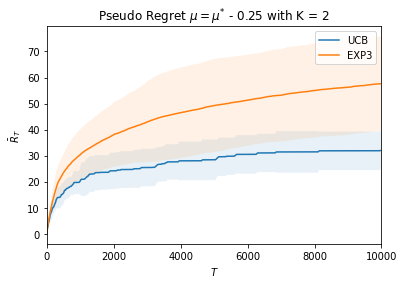

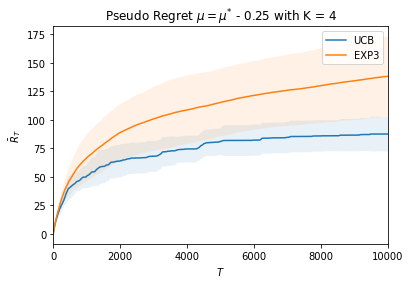

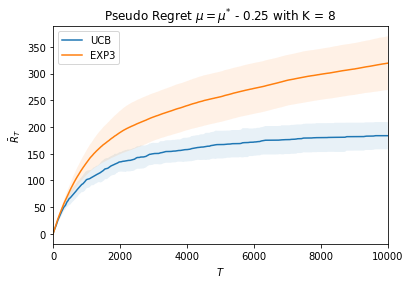

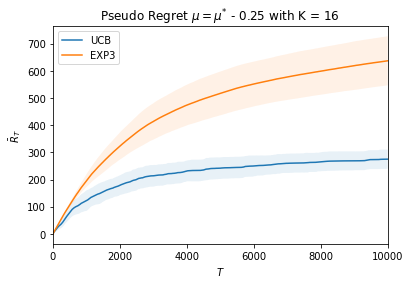

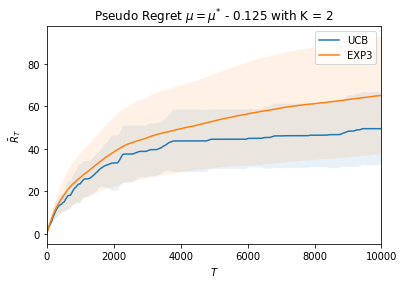

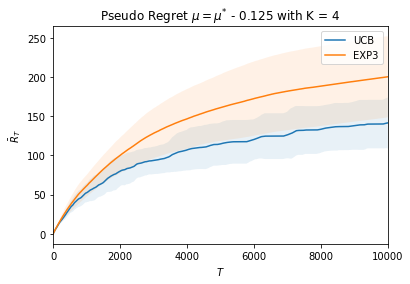

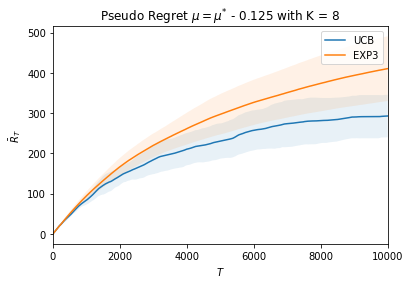

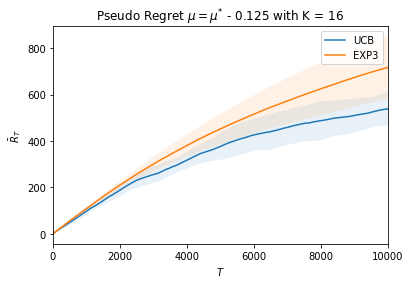

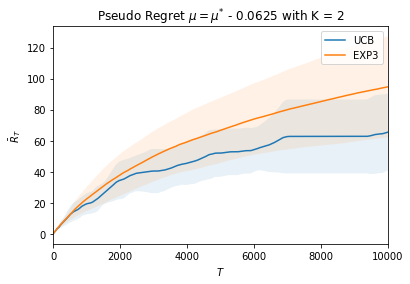

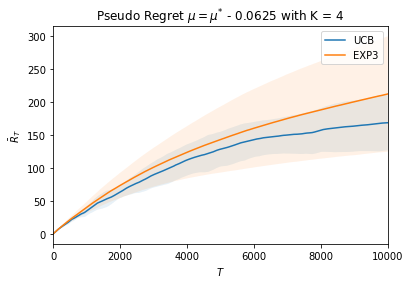

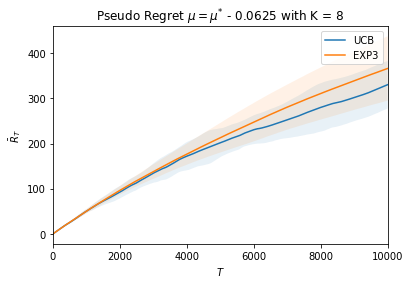

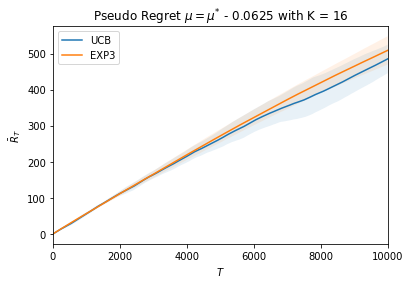

In [30]:
x_values = np.arange(T)
for i, u in enumerate(delta):
    for k in [2, 4, 8, 16]:
        y_values = [results[0][k][0][i], results[1][k][0][i]]
        stds = [results[0][k][1][i], results[1][k][1][i]]
        legend = ["UCB", "EXP3"]
        plot_curves(x_values, y_values, stds, legend_labels=legend, x_label=r"$T$",
                    y_label=r"$\bar{R}_{T}$", title=rf"Pseudo Regret $\mu = \mu^{{*}}$ - {u} with K = {k}")